<a href="https://colab.research.google.com/github/Abhiramnaidu1/Data_Mining/blob/main/Data_Mining_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#libraries

import tensorflow as tf
import numpy as np
import pandas as pd
import io
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.mlab as mlab
from scipy import stats, integrate
import seaborn as sns
sns.set(color_codes=True)
import warnings
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Abhiramnaidu1/Data_Mining/main/project_data.csv", header=None)
data = data.iloc[:,0:11]
data.columns = ['S.no','UserId','Machine ID','Date','Start Time','End Time','Average user process','Max User Process','keystrokes','CPU usage','page']


In [ ]:
data

,S.no,UserId,Machine ID,Date,Start Time,End Time,Average user process,Max User Process,keystrokes,CPU usage,page
0,1,U01,M01,90108,80010,170040,22,70,12345,12098,NaN
1,1,U03,M03,90108,82010,172040,22,70,12345,12098,NaN
2,1,U05,M05,90108,82310,171040,22,70,12345,12098,NaN
3,1,U07,M07,90108,80010,170040,22,70,12345,12098,NaN
4,1,U09,M09,90108,81040,170040,22,70,12345,12098,NaN
...,...,...,...,...,...,...,...,...,...,...,...
983,2,U16,M16,93008,162501,LP050,000870,F0019,RW,PR4,10
984,2,U17,M19,93008,162501,LP050,000870,F0019,RW,PR6,10
985,2,U13,M21,93008,170101,LP080,000920,F0179,R,NaN,NaN
986,2,U16,M16,93008,170101,LP080,000920,F0109,R,NaN,NaN


## **Login Patterns**

In [ ]:
#df_login = data[data["End Time"].str.contains("^[0-9]\w")]
df_login = data[data["S.no"]==1]
df_login =df_login.iloc[:,1:10]

df_login_columns=['User_ID','Machine_ID','Date','Start_Time','End_Time','Avg_UP','Max_UP','Keystrokes','CPU_Usage']
df_login =df_login.set_axis(df_login_columns, axis=1)

In [ ]:
df_login

,User_ID,Machine_ID,Date,Start_Time,End_Time,Avg_UP,Max_UP,Keystrokes,CPU_Usage
0,U01,M01,90108,80010,170040,22,70,12345,12098
1,U03,M03,90108,82010,172040,22,70,12345,12098
2,U05,M05,90108,82310,171040,22,70,12345,12098
3,U07,M07,90108,80010,170040,22,70,12345,12098
4,U09,M09,90108,81040,170040,22,70,12345,12098
...,...,...,...,...,...,...,...,...,...
930,U07,M07,93008,83000,173000,25,55,15455,13558
931,U08,M08,93008,83000,173000,25,55,15455,13558
932,U09,M09,93008,83000,173000,25,55,15455,13558
933,U10,M30,93008,83000,173000,25,55,15455,13558


### **Working Hours Pattern**

In [ ]:
#Duration
df_login.loc[:,'Duration'] = ((df_login.End_Time.astype(str).str[:-4].astype(int) * 60)+ df_login.End_Time.astype(str).str[-4:-2].astype(int) )-( (df_login.Start_Time.astype(str).str[:-4].astype(int)* 60)+df_login.Start_Time.astype(str).str[-4:-2].astype(int))
df_login.Duration 

0      540
1      540
2      527
3      540
4      530
      ... 
930    540
931    540
932    540
933    540
934    540
Name: Duration, Length: 389, dtype: int64

In [ ]:
aggregation={
         "Duration":
    {
        "MIN": lambda x: x.min(skipna=True),
        "MAX":lambda x: x.max(skipna=True),
        "MEDIAN":lambda x: x.median(skipna=True),
        "MEAN":lambda x:x.mean(skipna=True)
    }
}


In [ ]:
import math
df_duration = pd.DataFrame(df_login.groupby(['User_ID'])['Duration'].agg(minimum='min',maximum = 'max',mean = 'mean').round(0)).reset_index()
df_duration

,User_ID,minimum,maximum,mean
0,U01,518,569,544.0
1,U02,185,673,474.0
2,U03,518,569,544.0
3,U04,185,673,470.0
4,U05,518,569,543.0
5,U06,185,673,470.0
6,U07,518,569,544.0
7,U08,185,673,470.0
8,U09,518,569,544.0
9,U10,185,673,470.0


In [ ]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df_login[['Duration']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 1, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,

In [ ]:
df_login['cluster']=y_predicted
df_login

,User_ID,Machine_ID,Date,Start_Time,End_Time,Avg_UP,Max_UP,Keystrokes,CPU_Usage,Duration,cluster
0,U01,M01,90108,80010,170040,22,70,12345,12098,540,1
1,U03,M03,90108,82010,172040,22,70,12345,12098,540,1
2,U05,M05,90108,82310,171040,22,70,12345,12098,527,1
3,U07,M07,90108,80010,170040,22,70,12345,12098,540,1
4,U09,M09,90108,81040,170040,22,70,12345,12098,530,1
...,...,...,...,...,...,...,...,...,...,...,...
930,U07,M07,93008,83000,173000,25,55,15455,13558,540,1
931,U08,M08,93008,83000,173000,25,55,15455,13558,540,1
932,U09,M09,93008,83000,173000,25,55,15455,13558,540,1
933,U10,M30,93008,83000,173000,25,55,15455,13558,540,1


In [ ]:
import scipy
df_login.groupby(['User_ID'])['cluster'].agg(lambda x: scipy.stats.mode(x)[0])

User_ID
U01    1
U02    1
U03    1
U04    1
U05    1
U06    1
U07    1
U08    1
U09    1
U10    1
U11    1
U12    1
U13    1
U14    1
U15    1
U16    1
U17    1
U18    1
U19    1
Name: cluster, dtype: int32

In [ ]:
km.cluster_centers_

array([[295.89473684],
       [547.01574803],
       [686.08108108],
       [120.90243902]])

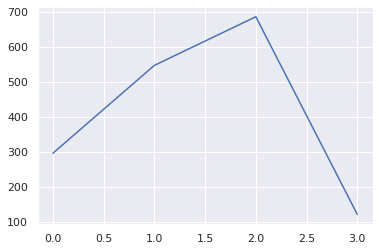

In [ ]:
plt.plot(km.cluster_centers_)

No handles with labels found to put in legend.


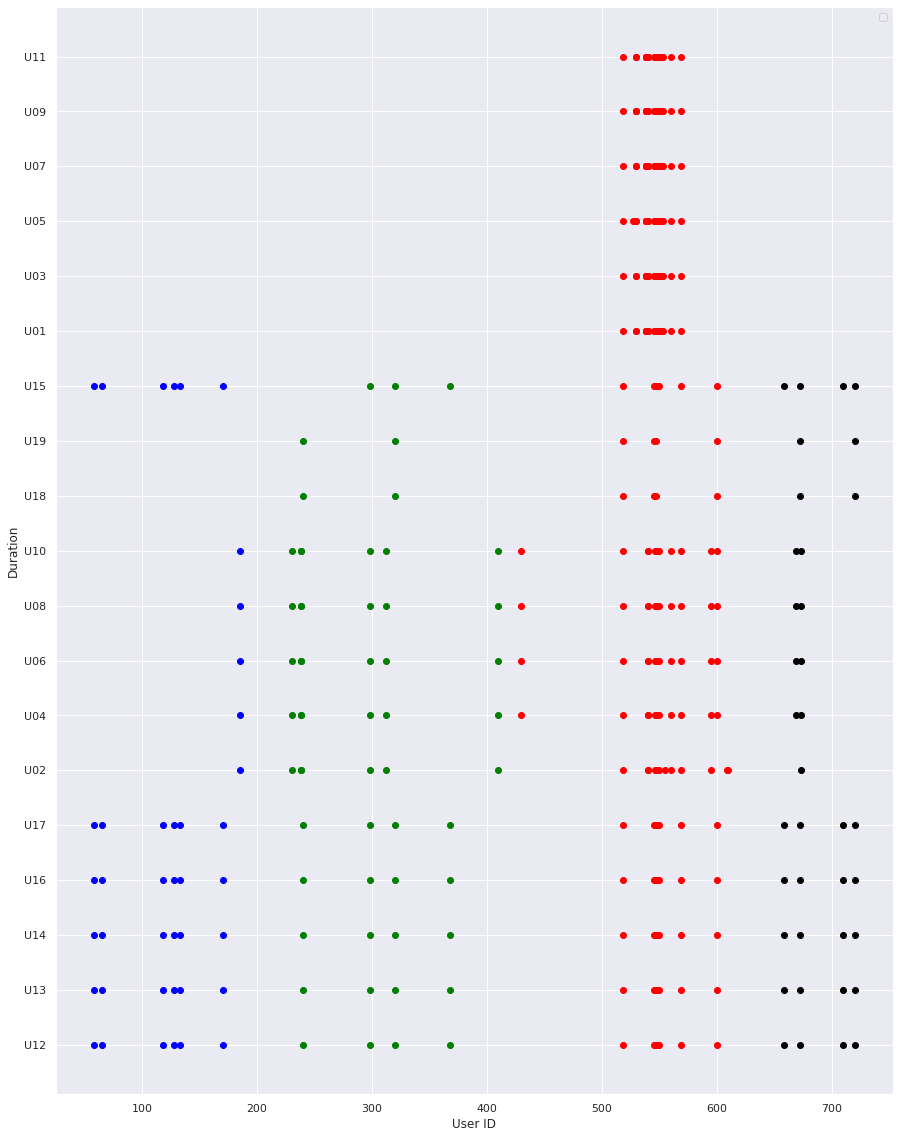

In [ ]:
df1 = df_login[df_login.cluster==0]
df2 = df_login[df_login.cluster==1]
df3 = df_login[df_login.cluster==2]
df4 = df_login[df_login.cluster==3]
plt.figure(figsize=(15,20))
plt.scatter(df1.Duration,df1.User_ID,color='green')
plt.scatter(df2.Duration,df2.User_ID,color='red')
plt.scatter(df3.Duration,df3.User_ID,color='black')
plt.scatter(df4.Duration,df4.User_ID,color='blue')
#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('User ID')
plt.ylabel('Duration')
plt.legend()

In [ ]:
df_duration.groupby(['mean'])['User_ID'].apply(list)

mean
413.0    [U12, U13, U14, U16, U17]
421.0                        [U15]
470.0         [U04, U06, U08, U10]
474.0                        [U02]
520.0                   [U18, U19]
543.0                        [U05]
544.0    [U01, U03, U07, U09, U11]
Name: User_ID, dtype: object

**OneR**

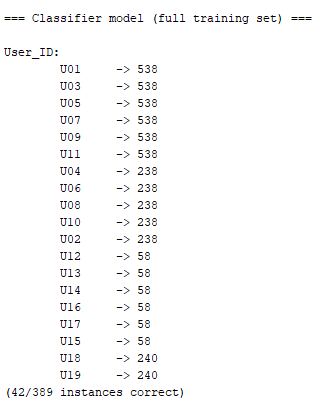

 **K means**

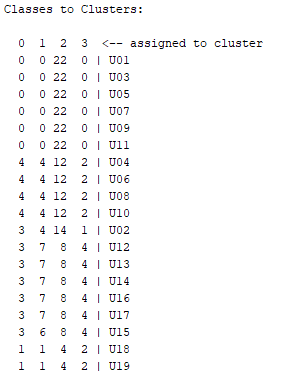

Group 1 : U01,U03,U05,U07,U09,U11



In [ ]:

from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
# from tensorflow import contrib
# from tf.contrib.factorization import KMeans
# from tensorflow.examples.tutorials.mnist import input_data


In [ ]:
kmeans_func=KMeans(n_clusters=4, init="k-means++")
kmeans_func.fit(df_duration.iloc[:,1:])

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (14, 10))
f1 = df_login.User_ID.values
f2 = df_login.Duration.values
X = np.array(list(zip(f1, f2)))
ax.set_title("\n \n  Scatter Plot ", fontsize = 15)
ax.scatter(f1, f2, c='black', s=7)
ax.set_xlabel(" Users ", fontsize = 20)
ax.set_ylabel(" Working Hours ", fontsize = 20)
plt.show()

### Login Patterns

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (14, 10))
f1 = df_login.User_ID.values
f2 = df_login.Start_Time.values
X = np.array(list(zip(f1, f2)))
ax.set_title("\n \n  Scatter Plot ", fontsize = 15)
ax.scatter(f1, f2, c='black', s=7)
ax.set_xlabel(" Users ", fontsize = 20)
ax.set_ylabel(" LoginTime ", fontsize = 20)
plt.show()

### Logout Patterns

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (14, 10))
f1 = df_login.User_ID.values
f2 = df_login.End_Time.values
X = np.array(list(zip(f1, f2)))
ax.set_title("\n \n  Scatter Plot ", fontsize = 15)
ax.scatter(f1, f2, c='black', s=7)
ax.set_xlabel(" Users ", fontsize = 20)
ax.set_ylabel(" Logout Time ", fontsize = 20)
plt.show()

###**Average user processes**

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (14, 10))
f1 = df_login.User_ID.values
f2 = df_login.Avg_UP.values
X = np.array(list(zip(f1, f2)))
ax.set_title("\n \n  Scatter Plot ", fontsize = 15)
ax.scatter(f1, f2, c='black', s=7)
ax.set_xlabel(" Users ", fontsize = 20)
ax.set_ylabel(" Average User Process ", fontsize = 20)
plt.show()

### **Max User Process**

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (14, 10))
f1 = df_login.User_ID.values
f2 = df_login.Max_UP.values
X = np.array(list(zip(f1, f2)))
ax.set_title("\n \n  Scatter Plot ", fontsize = 15)
ax.scatter(f1, f2, c='black', s=7)
ax.set_xlabel(" Users ", fontsize = 20)
ax.set_ylabel(" Max User Process ", fontsize = 20)
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (14, 10))
f1 = df_login.User_ID.values
f2 = df_login.Keystrokes.values
X = np.array(list(zip(f1, f2)))
ax.set_title("\n \n  Scatter Plot ", fontsize = 15)
ax.scatter(f1, f2, c='black', s=7)
ax.set_xlabel(" Users ", fontsize = 20)
ax.set_ylabel(" Keystrokes ", fontsize = 20)
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (14, 10))
f1 = df_login.User_ID.values
f2 = df_login.CPU_Usage.values
X = np.array(list(zip(f1, f2)))
ax.set_title("\n \n  Scatter Plot ", fontsize = 15)
ax.scatter(f1, f2, c='black', s=7)
ax.set_xlabel(" Users ", fontsize = 20)
ax.set_ylabel(" CPU usage ", fontsize = 20)
plt.show()

In [ ]:
df_login

In [ ]:
df_login.to_csv('df_login.csv',index=False)

## **User Program Patterns**

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Abhiramnaidu1/Data_Mining/main/project_data.csv", header=None)
df_UP = data.iloc[:,0:9]
df_UP.columns = ['S.no','User','Machine','Date','Start Time','Program','Execution time','File','File Access']

In [ ]:
df_UP = df_UP[df_UP["Program"].str.contains("(UP)\w+")]

In [ ]:
df_UP

### **User Programs pattern**

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (14, 10))
f1 = df_UP.User.values
f2 = df_UP.Program.values
X = np.array(list(zip(f1, f2)))
ax.set_title("\n \n  Scatter Plot ", fontsize = 15)
ax.scatter(f1, f2, c='black', s=7)
ax.set_xlabel(" Users ", fontsize = 20)
ax.set_ylabel(" Program ", fontsize = 20)
plt.show()

### **User Execution Time**

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (14, 10))
f1 = df_UP.User.values
f2 = df_UP['Execution time'].values
X = np.array(list(zip(f1, f2)))
ax.set_title("\n \n  Scatter Plot ", fontsize = 15)
ax.scatter(f1, f2, c='black', s=7)
ax.set_xlabel(" Users ", fontsize = 20)
ax.set_ylabel(" Execution Time ", fontsize = 20)
plt.show()

### **Programs and Execution time pattern**

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (14, 10))
f1 = df_UP.Program.values
f2 = df_UP['Execution time'].values
X = np.array(list(zip(f1, f2)))
ax.set_title("\n \n  Scatter Plot ", fontsize = 15)
ax.scatter(f1, f2, c='black', s=7)
ax.set_xlabel(" Programs ", fontsize = 20)
ax.set_ylabel(" Execution Time ", fontsize = 20)
plt.show()

## **File Access Patterns**

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Abhiramnaidu1/Data_Mining/main/project_data.csv", header=None)
df_FA = data.iloc[:,0:9]
df_FA.columns = ['S.no','User','Machine','Date','Start Time','Program','Execution time','File','File Access']
df_FA =df_FA[df_FA['S.no']== 2]

In [ ]:
df_FA
# df_FA[df_FA['Max User Process'] == 'F0070']

### **Users and Files pattern**

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (14, 10))
f1 = df_FA.User.values
f2 = df_FA['File'].values
X = np.array(list(zip(f1, f2)))
ax.set_title("\n \n  Scatter Plot ", fontsize = 15)
ax.scatter(f1, f2, c='black', s=7)
ax.set_xlabel(" User ", fontsize = 20)
ax.set_ylabel(" Files ", fontsize = 20)
plt.show()

### **Users and Programs pattern**

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (14, 10))
f1 = df_FA.User.values
f2 = df_FA.Program.values
X = np.array(list(zip(f1, f2)))
ax.set_title("\n \n  Scatter Plot ", fontsize = 15)
ax.scatter(f1, f2, c='black', s=7)
ax.set_xlabel(" User ", fontsize = 20)
ax.set_ylabel(" Programs ", fontsize = 20)
plt.show()

### **Users and File Access pattern**

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (14, 10))
f1 = df_FA.User.values
f2 = df_FA['File Access'].values
X = np.array(list(zip(f1, f2)))
ax.set_title("\n \n  Scatter Plot ", fontsize = 15)
ax.scatter(f1, f2, c='black', s=7)
ax.set_xlabel(" User ", fontsize = 20)
ax.set_ylabel(" File Access ", fontsize = 20)
plt.show()

## **Printer Usage Patterns**

In [ ]:

data = pd.read_csv("https://raw.githubusercontent.com/Abhiramnaidu1/Data_Mining/main/project_data.csv", header=None)
data = data.iloc[:,0:11]
data.columns = ['S.no','UserId','Machine ID','Date','Start Time','End Time','Average user process','Max User Process','keystrokes','CPU usage','page']
data

In [ ]:
data['CPU usage'] = data['CPU usage'].fillna('a')

warnings.filterwarnings("ignore", 'This pattern has match groups')
df_PA = data[data['CPU usage'].str.contains("^(PR)\w+")]
df_PA.columns = ['S.no','UserId','Machine ID','Date','Start Time','Program','Execution Time','File','Access','Printer','Pages']
df_PA = df_PA.iloc[:,[1,2,3,4, 9,10]]
df_PA['Pages'] = pd.to_numeric(df_PA['Pages'])
df_PA_grouped = df_PA.groupby('Printer')['UserId'].unique().apply(list)
df_PA_grouped


In [ ]:

f1 = df_PA.UserId.values
f2 = df_PA.Printer.values
f3 = df_PA.Pages.values
X = np.array(list(zip(f1, f2)))
fig, ax = plt.subplots(3, 1, figsize = (15, 10))
ax[0].set_title("\n \n  Scatter Plot ", fontsize = 15)
ax[0].scatter(f1, f3, c='black', s=7)
ax[0].set_xlabel(" Users ", fontsize = 10)
ax[0].set_ylabel(" Pages ", fontsize = 10)
ax[1].set_title("\n \n  Scatter Plot ", fontsize = 15)
ax[1].scatter(f1, f2, c='black', s=7)
ax[1].set_xlabel(" Users ", fontsize = 10)
ax[1].set_ylabel(" Printer ", fontsize = 10)
ax[1].set_title("\n \n  Scatter Plot ", fontsize = 15)
ax[2].scatter(f2, f3, c='black', s=7)
ax[2].set_xlabel(" Printer ", fontsize = 10)
ax[2].set_ylabel(" Pages ", fontsize = 10)
plt.show()

In [ ]:

df_detail = df_PA.groupby('UserId').agg({'Pages':['max', 'min', 'mean', lambda x: pd.Series.mode(x)[0]], 'Printer':[lambda x: pd.Series.mode(x)[0]]})
df_detail = df_detail.reset_index()
df_detail.columns = df_detail.columns.get_level_values(0)
df_detail.columns = ['UserId', 'num_page_max', 'num_page_min', 'num_page_avg', 'often_pages_count', 'frequent(closest/prefered)']
df_detail
# df_detail.to_csv('printer_details.csv')


## **Email Patterns**

In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/Abhiramnaidu1/Data_Mining/main/project_data.csv", header=None)
data = data.iloc[:,0:11]
data.columns = ['S.no','UserId','Machine ID','Date','Start Time','End Time','Average user process','Max User Process','keystrokes','CPU usage','page']

warnings.filterwarnings("ignore", 'This pattern has match groups')
df_email = data[data["End Time"].str.contains("(E)\w")]
# df_email = df_email[df_email['UserId'] == 'U04']
# df_email

In [ ]:
def iterate_email(x):
  df_action_group = x.group_by(['Sent/Receive'])

In [ ]:
df_emails = df_email.iloc[:,0:10]
df_emails.columns = ['S.no','UserId','Machine ID','Date','Start Time','Email Program','Email Address','Sent/Receive','Bytes','Attachment']

#df_emails = df_emails.groupby('Email Address')['UserId'].unique().apply(list)

df_emails_userids = df_emails.groupby(['Sent/Receive','Email Address'])['UserId'].unique().apply(list)
df_emails_userids 

df_rows = []

df_emails_userids = df_emails_userids.groupby(['Sent/Receive','Email Address'])
for name, group in df_emails_userids:
  print(name)
  for row_index, row in group.iteritems():
   print(row)
   df_row = { 'Email Address': name[1], 'Sent/Receive': name[0], 'UserIds' : ",".join(row) }
   df_rows.append(df_row)

df_email_groups = pd.DataFrame(df_rows)
df_email_groups

('R', 'bob@xyz.com')
['U15', 'U16', 'U17', 'U18', 'U19']
('R', 'mom@icare.com')
['U06', 'U08', 'U10']
('R', 'smith@abc.org')
['U06', 'U08', 'U10']
('S', 'jones@pqr.com')
['U01', 'U02', 'U03', 'U05', 'U04']
('S', 'mom@icare.com')
['U02', 'U04']
('S', 'smith@abc.org')
['U07', 'U09']
('S', 'xyz@sai.org')
['U11', 'U12', 'U13', 'U14']


,Email Address,Sent/Receive,UserIds
0,bob@xyz.com,R,"U15,U16,U17,U18,U19"
1,mom@icare.com,R,"U06,U08,U10"
2,smith@abc.org,R,"U06,U08,U10"
3,jones@pqr.com,S,"U01,U02,U03,U05,U04"
4,mom@icare.com,S,"U02,U04"
5,smith@abc.org,S,"U07,U09"
6,xyz@sai.org,S,"U11,U12,U13,U14"


## **Machine Usage Patterns**

In [ ]:
df_machine = data[data["Machine ID"].str.contains("(M)\w+")]

In [ ]:
df_machine